In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [174]:
import os
print(os.getcwd())

/Users/nel-mous/Desktop/Unlocking-Customer-Insights


In [171]:
"""
- Reads the dataset into a Pandas DataFrame
- Displays asic information about the dataset
"""
df = pd.read_csv('./data/bank.csv') 
print("dataset Overview:\n")
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
                age       balance           day      duration      campaign

In [172]:
"""
## Handling Missing values
- Replaces missing values in numerical columns with the median
- Fills missing values in categorical columns with the mode
"""
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [175]:
"""
    - Drops duplicate rows to ensure data integrity.
"""
df.drop_duplicates(inplace=True)
# print(df.shape)

In [178]:
#Handling Outliers (using IQR-Interquartile Range Method)
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
iqr = Q3 - Q1
outlier_condition = (df[numeric_cols] < (Q1 - 1.5 * iqr)) | (df[numeric_cols] > (Q3 + 1.5 * iqr))

# Remove rows where any numerical colmn has an outlier
df = df[~outlier_condition.any(axis=1)]
#check new shape after removing outliers
print(df.shape)

(5496, 17)


In [176]:
"""
    # Encoding Categorical Variables
    - Converts categorical features into numerical representations
"""
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [177]:
"""
    # Scaling Numerical Features
    - Standardizes numerical columns to have zero mean and unit variance
"""
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

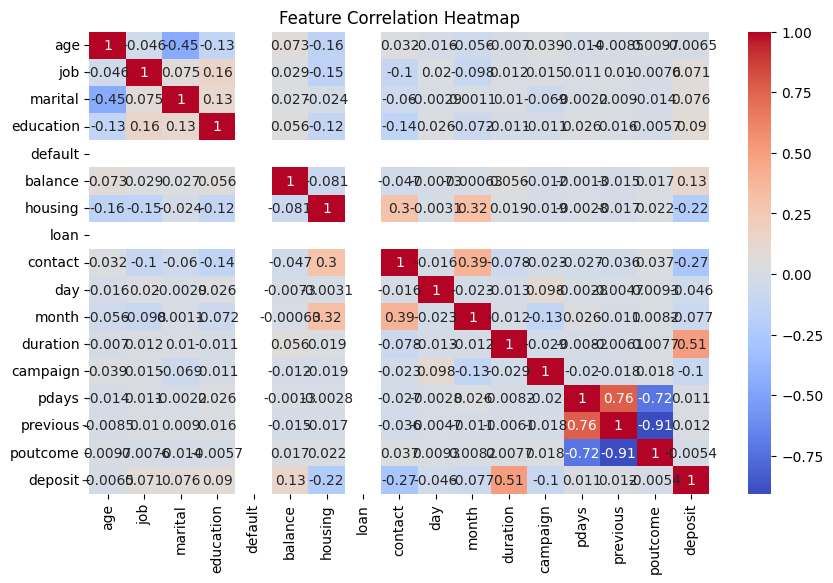

In [179]:
"""
## Exploratory Data Analysis (EDA) - Feature Correlation Heatmap
- Visualizes the correlation between numerical features using a heatmap.
"""
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

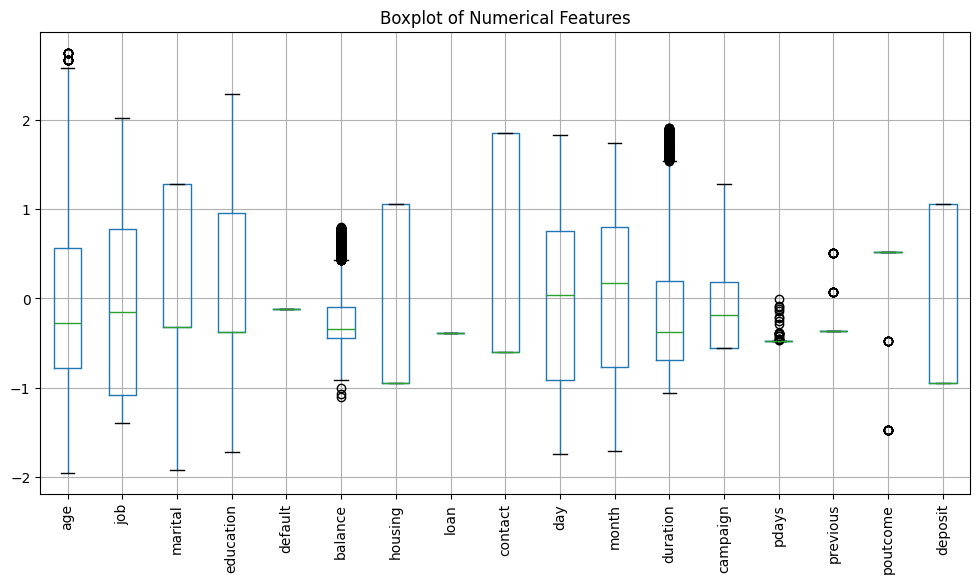

In [182]:
"""  
## Boxplot for outlier Detection
- Displays bocplots for numerical features to identify potential outliers
"""
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.show()

<Figure size 1200x800 with 0 Axes>

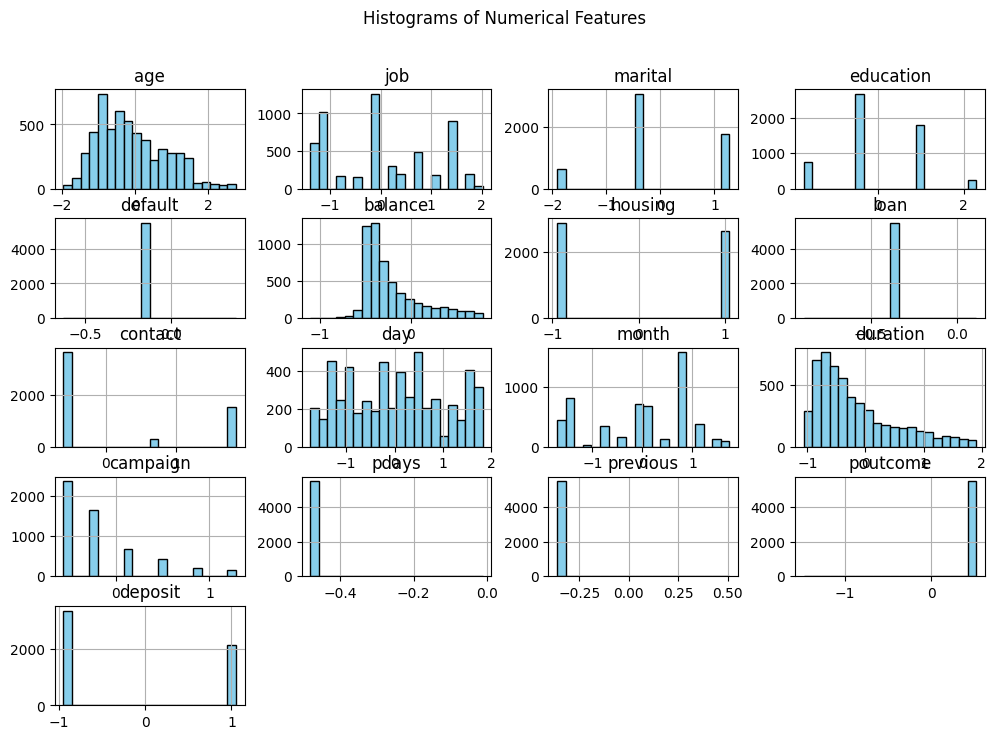

In [181]:
""" 
#Additional visualizations
-Histogram of numerical fetaures to check distributions
- Count plots for categorical variables
"""

#Histograms of numerical features
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12,8))
df[numeric_cols].hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [180]:
# Count plots for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotations=45)
    plt.show()

In [ ]:
"""
## 10. Save the Preprocessed Data
- Saves the cleaned dataset to a CSV file for further analysis in Task 2.
"""
df.to_csv('results/preprocessed_data.csv', index=False)
print("\nPreprocessed dataset saved successfully!")